In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import quad
from scipy.integrate import solve_ivp

# 2. Caminar con café y ecuaciones diferenciales

"*It is common everyday knowledge to each of us that any small container filled with liquid must be moved or carried very carefully to avoid spills*". Abrahmsom, 1967



---


Las dinámicas del liquido dentro de una taza de café que está siendo llevada por una persona involucran biomecánica, mecánica de fluidos y sistemas dinámicos (Mayer y Krechetnikov, 2012). En el presente trabajo se resolverá un sistema de ecuaciones diferenciales numericamente, con base en lo presentado en dos estudios previos (Mayer y Krechetnikov, 2012; Guarín, 2021).

## Oscilaciones naturales

Las oscilaciones naturales de un líquido son las formas específicas en las que un líquido tiende a moverse dentro de un contenedor. Para nuestro caso, son los "ritmos de baile" preferidos por el café dentro de la tasa. Si el movimiento a la hora de llevar la tasa se alínea con estas frecuencias naturales, el baile del café, en inglés *sloshing*, se verá amplificado, lo que lleva a derramarlo. Las frecuencias naturales de oscilación de un líquido sin fricción, vórtices e incompresible en una tasa, como el café, vienen dadas por una fórmula bien conocida:

$$
\omega_{mn}^{2} = \frac{g \varepsilon_{mn}}{R} \tanh \left( \frac{\varepsilon_{mn} H}{R} \right) \left( 1 + \frac{\sigma}{\rho g} \left( \frac{\varepsilon_{mn}}{R} \right)^2 \right)
$$

En esta ecuación, $H$ es la altura del líquido, $\rho$ es la densidad, $R$ es el radio de la tasa $\sigma$ es la tensión superficial del líquido,  $g$ es la aceleración de la gravedad, y los valores $\epsilon_{mn}$ son las raices de la primera derivada de $m$-ávo orden de la función de Bessel del primer tipo.

## Modelando la situación como un péndulo

Para analizar las mecánicas del sistema (una tasa de café siendo llevada por una persona caminando en línea recta), se propone un modelo mecánico simple basado en las ecuaciones esféricas del péndulo con oscilaciones forzadas. El uso de este modelo se basa en que un péndulo esférico presenta dinámicas similares al *sloshing* del café en una tasa.

Dado que el café está siendo llevado por una persona caminando, las dinámicas del caminado introducen excitaciones en el líquido, llamadas *excitaciones parámetricas*. Estas excitaciones parámetricas son las que causan el *sloshing* del café. Por lo tanto, las dinámicas del café pueden ser entendidas en términos de un oscilador con excitación paramétrica causada por el movimiento de la tasa a lo largo del camino. Luego, el sistema puede ser concebido como un péndulo en el que el largo de la vara cambia a través del tiempo. Siguiendo el análisis en (Guarín, 2021), vamos a restringir la excitación del sistema a las dinámicas del pivote.

## Fancy-schemancy physics witchery

Una historía física de Lagrangianos y ecuaciones de Euler-Lagrange lleva al siguiente modelo

$$
r^2 \ddot{\theta} + r [g + \ddot{z}_0] \sin\theta + r \ddot{x}_0 \cos\theta + 2r \dot{r} \dot{\theta} = 0,
$$

donde $r_0$ es la longitud original de la vara, $r$ la longitud de la vara que depende del tiempo, $m$ la masa del pivote, $g$ la aceleración gravitacional, y $x_0$, $z_0$ son funciones en el tiempo que describen la posición horizontal y vertical del pivote, respectivamente. La ecuación diferencial anterior es altamente no lineal por la presencia de funciones trigonométricas. Para facilitar el análisis, se realiza una expansión en series de Taylor de $\theta$ alrededor de $0$ para obtener

$$
r^2 \ddot{\theta} + r [g + \ddot{z}_0] \left( \theta - \frac{\theta^3}{6} \right) + r \ddot{x}_0 \frac{\theta^2}{2} + 2r \dot{r} \dot{\theta} = -r \ddot{x}_0.
$$

## Movimiento vertical del pivote

Si consideramos solo el movimiento vertical del pivote, la ecuación diferencial es

$$
u'' + \Bigl[1 + \epsilon \lambda \Omega^2 \cos(\Omega \tau)\Bigr] \left( u - \frac{\epsilon u^3}{6} \right) = 0, \tag{4}
$$

donde se definen los parámetros:

- $\tau = \omega t$,
- $\omega_0^2 = \dfrac{g}{r_0}$,
- $\epsilon \lambda = -\dfrac{\Delta z}{r_0}$,
- $\Omega = \dfrac{\omega}{\omega_0}$.

donde $\tau$ es el reescalamiento del tiempo con respecto a la frecuencia de excitación $\omega$, el término $\epsilon \lambda$ mide la magnitud del movimiento vertical del pivote respecto a la escala del sistema, donde $\epsilon$ actúa como un parámetro que permite tratar estos términos como perturbaciones, y por último $\Omega$ es la frecuencia de excitaicón adimensional, que relaciona la excitación parámetrica con la frecuencia natural del sistema.  

### 3. Reescribir la ecuación 4 como un sistema de ecuaciones diferenciales ordinarias de primer orden.

Primero se despeja $u''$ de la ecuacion, con lo cual se obtiene:
$$
u'' \;=\; -\,\bigl[1 + \varepsilon \lambda \,\Omega^2 \cos(\Omega\,\tau)\bigr]
\biggl(u \;-\; \tfrac{\varepsilon^2}{6}\,u^3\biggr)
$$

Ahora, observe que al realizar las siguientes sustituciones:

- $y_1 = u$,
- $y_2 = \dfrac{du}{d\tau}$,

y al derivar, se llega al sistema de ecuaciones diferenciales ordinarias deseado, pues:

- $\dfrac{dy_1}{d\tau} = \dfrac{du}{d\tau} = y_2,$
- $\dfrac{dy_2}{d\tau} = \dfrac{d^2 u}{d\tau^2}
= -\,\bigl[1 + \varepsilon \lambda \,\Omega^2 \cos(\Omega\,\tau)\bigr]
\bigl(u - \tfrac{\varepsilon^2}{6} \,u^3\bigr).$

Además, al sustituir $y_1 = u$ en la segunda ecuación, se obtiene:

$$
\begin{cases}
\dfrac{d y_{1}}{d\tau} = y_{2}, \\[6pt]
\dfrac{d y_{2}}{d\tau} = -\Bigl[\,1 + \varepsilon \lambda \,\Omega^2 \cos\bigl(\Omega\,\tau\bigr)\Bigr]\!
\Bigl(y_{1} \;-\; \tfrac{\varepsilon^2\,y_{1}^3}{6}\Bigr).
\end{cases}
$$


### 4. Solucion del sistema con `solve_ivp` de SciPy

In [2]:
def sloshing(t, y, epsilon, lam, Omega):
  y1, y2 = y
  dy1_dt = y2
  dy2_dt = - (1 + epsilon * lam * Omega**2 * np.cos(Omega * t)) * (y1 - (epsilon**2 / 6) * y1**3)

  return [dy1_dt, dy2_dt]


La definición anterior de la función fue realizada de acuerdo con los ejemplos presentados en *Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & van Mulbregt, P. (2020). SciPy: Fundamental algorithms for scientific computing in Python (Version 1.9). SciPy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html*.

Ahora bien, para elegir los parámetros se tendrán en cuenta múltiples aspectos:

*   Seleccionar parámetros que simplifiquen el análisis, por ejemplo: $$\varepsilon=0,\ \lambda=0$$

*   Escoger $\varepsilon$ en distintas magnitudes, ya que, si este parámetro es muy grande (en teoría), el sistema se vuelve altamente no lineal. En la ecuación (4) se observa que, en caso de que $\varepsilon$ sea grande, el término no lineal $\frac{\varepsilon^2 u^3}{6}$ domina sobre el término lineal $u$, lo cual intensifica la no linealidad del sistema.

*   El parámetro $\lambda$ se asocia con la amplitud del forzamiento externo (también se presenta en el paper como la proporción entre la *longitud efectiva* y la *amplitud de la oscilación*), por lo que incrementarlo puede provocar una respuesta más fuerte o, en algunos casos, más caótica. En particular, de acuerdo con (Guarín, 2021), valores pequeños de este parámetro implican la posibilidad de caminar más tiempo con el café sin derramarlo.

*   Será importante alterar el parámetro $\Omega = \frac{\omega}{\omega_0}$, el cual indica la frecuencia de excitación relativa; por ello, modificar dicho parámetro resulta fundamental para analizar el comportamiento del sistema.

* Por ultimo, veremos que ocurre al modificar los valores iniciales.

### Prueba 1:

Buscamos la simplificación del sistema y analizar cómo la alteración de $Ω$ afecta su comportamiento. En particular, se desea examinar qué ocurre en la simplificación cuando $Ω$ es mucho mayor que 1 y cuando es muy cercano a 1.

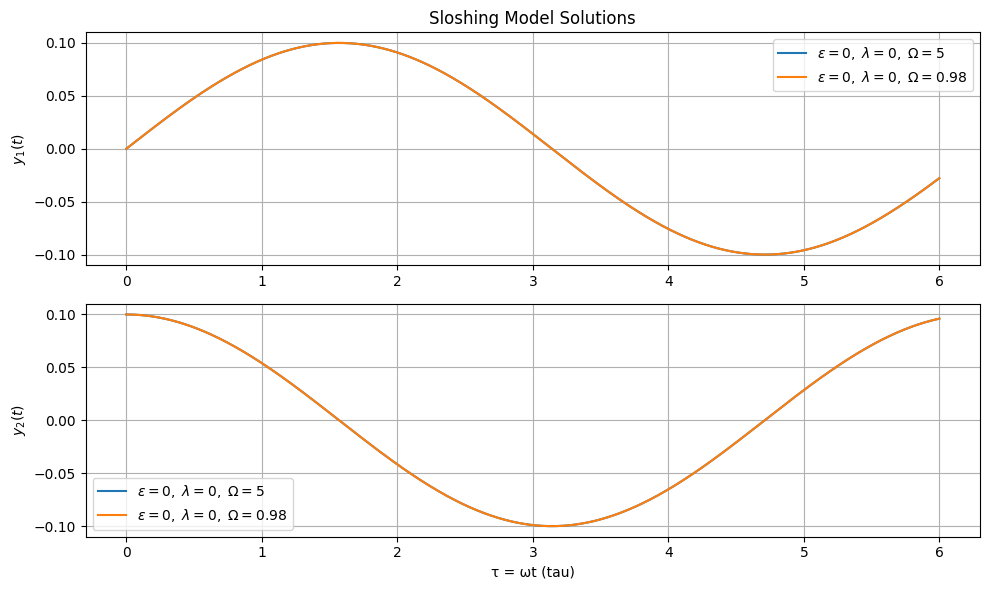

In [3]:
epsilon1, lam1, Omega1 = 0, 0, 5
t_span = (0.0, 6.0)
#Valores iniciales y_1(0) = 0.0 y y_2(0) = 0.1
y0 = [0.0, 0.1]

sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon1, lam1, Omega1),dense_output=True)

t_eval = np.linspace(t_span[0], t_span[1], 1000)

y1_sol1 = sol1.sol(t_eval)[0]
y2_sol1 = sol1.sol(t_eval)[1]


epsilon2, lam2, Omega2 = 0, 0, 0.98

sol2 = solve_ivp(sloshing, t_span, y0, method='RK45' ,args=(epsilon2, lam2, Omega2), dense_output=True)

y1_sol2 = sol2.sol(t_eval)[0]
y2_sol2 = sol2.sol(t_eval)[1]

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_eval, y1_sol1, label=r'$\varepsilon=0,\ \lambda=0,\ \Omega=5$')
plt.plot(t_eval, y1_sol2, label=r'$\varepsilon=0,\ \lambda=0,\ \Omega=0.98$')
plt.title('Sloshing Model Solutions')
plt.ylabel('$y_1(t)$')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_eval, y2_sol1, label=r'$\varepsilon=0,\ \lambda=0,\ \Omega=5$')
plt.plot(t_eval, y2_sol2, label=r'$\varepsilon=0,\ \lambda=0,\ \Omega=0.98$')
plt.xlabel('τ = ωt (tau)')
plt.ylabel('$y_2(t)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Se ha simplificado el sistema imponiendo $\varepsilon = 0$ y $\lambda = 0$; de este modo, la ecuación se reduce esencialmente a la de un oscilador armónico simple con frecuencia natural unitaria (en las unidades de $\tau$). Al mismo tiempo, se varía el parámetro $\Omega$ para observar su efecto:

La comparación entre $\Omega=5$ y $\Omega=0.98$ ilustra claramente que, incluso en un sistema lineal sin forzamiento externo (ni términos no lineales), el valor de $\Omega$ no determina la cantidad de oscilaciones que se observan en un intervalo dado de $\tau$. Al tratarse de un caso simplificado, no se produce crecimiento de amplitud ni se evidencian efectos resonantes muy marcados.

Lo anterior se aprecia con mayor claridad al escribir la ecuación original tras la simplificación:

$$
\frac{d^2 u}{d\tau ^2} = - u
$$

donde la solución de la ecuación diferencial es:
$$
u(\tau) = c_1 cos(\tau) + c_2 sen(\tau)
$$
(Simmons, G. F. (1991). Differential equations with applications and historical notes (2nd ed.). McGraw-Hill. pag 33.)

lo cual concuerda con lo observado en la gráfica.

### Prueba 2:

Ahora, dejando los valores de $\lambda$ como en el paper: 0.1, 0.2 o 0.3, veamos qué ocurre si se alteran los valores de $\varepsilon$, en especial, qué sucede cuando este parámetro es muy grande o muy pequeño.

In [4]:
import ipywidgets as widgets
from ipywidgets import interact

def plot_sloshing(epsilon=0.01):
    # Parámetros fijos
    lam = 0.2
    Omega = 1.0
    t_span = (0.0, 6.0)
    y0 = [0.0, 0.1]  # Condiciones iniciales

    # Solución 1: con ε variable (valor elegido por el slider)
    sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon, lam, Omega), dense_output=True)

    # Solución 2: con ε fijo en 10
    sol2 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(10, lam, Omega), dense_output=True)

    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    y1_sol1 = sol1.sol(t_eval)[0]
    y2_sol1 = sol1.sol(t_eval)[1]

    y1_sol2 = sol2.sol(t_eval)[0]
    y2_sol2 = sol2.sol(t_eval)[1]

    plt.figure(figsize=(10, 6))

    # Primer subplot: y1(t)
    plt.subplot(2, 1, 1)
    plt.plot(t_eval, y1_sol1, label=r'$y_1(t)$, $\varepsilon={:.3f}$'.format(epsilon))
    plt.plot(t_eval, y1_sol2, label=r'$y_1(t)$, $\varepsilon=10$')
    plt.title('Soluciones del modelo de Sloshing')
    plt.ylabel('$y_1(t)$')
    plt.grid(True)
    plt.legend()

    # Segundo subplot: y2(t)
    plt.subplot(2, 1, 2)
    plt.plot(t_eval, y2_sol1, label=r'$y_2(t)$, $\varepsilon={:.3f}$'.format(epsilon))
    plt.plot(t_eval, y2_sol2, label=r'$y_2(t)$, $\varepsilon=10$')
    plt.xlabel('τ = ωt (tau)')
    plt.ylabel('$y_2(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

print("A continuacion se puede interactuar con el grafico: ")
# Creamos el slider interactivo para ε
interact(plot_sloshing, epsilon=(0.001, 20.0, 0.001));

A continuacion se puede interactuar con el grafico: 


interactive(children=(FloatSlider(value=0.01, description='epsilon', max=20.0, min=0.001, step=0.001), Output(…

### Pregunta curiosa: Que ocurre si $ɛ\geq 10.5$? (Interactuar con el grafico)

**Caso $\varepsilon=0.01$:** el término cúbico $\tfrac{\varepsilon^2\,u^3}{6}$ resulta prácticamente insignificante en comparación con el término lineal $u$.  

Esto hace que las oscilaciones de $y_1(\tau)$ y $y_2(\tau)$ (desplazamiento y velocidad) se asemejen mucho a las de un oscilador casi lineal: la forma es aproximadamente sinusoidal y la amplitud se mantiene razonablemente equilibrada entre el lado positivo y el negativo.

**Caso $\varepsilon=10$:**  Al incrementar $\varepsilon$ de forma drástica, la contribución del término $\tfrac{\varepsilon^2\,u^3}{6}$ cobra gran relevancia.  En la gráfica se observa cómo las soluciones comienzan a *perder su simetría* y presentan variaciones más notables en la amplitud y la posición de equilibrio aparente.  

El desplazamiento $y_1(\tau)$ muestra un perfil más inclinado y un sesgo hacia valores más negativos, lo que indica que la parte cúbica está modificando fuertemente la evolución temporal de la respuesta.


### Prueba 3

Veamos qué ocurre al alterar el parámetro $λ$. Consideremos el caso en el que $ε$ sea pequeño, lo que favorece la linealidad, y en el que $Ω$ sea igual a 1.

In [5]:
def plot_sloshing(lam=10):
    epsilon = 0.1
    Omega = 1.0
    t_span = (0.0, 6.0)
    y0 = [0.0, 0.1]  # Condiciones iniciales

    # Solución con lambda variable (valor del slider)
    sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon, lam, Omega), dense_output=True)

    # Solución con lambda fijo en 0.01
    sol2 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon, 0.01, Omega), dense_output=True)

    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    y1_sol1 = sol1.sol(t_eval)[0]
    y2_sol1 = sol1.sol(t_eval)[1]

    y1_sol2 = sol2.sol(t_eval)[0]
    y2_sol2 = sol2.sol(t_eval)[1]

    plt.figure(figsize=(10, 6))

    # Primer subplot: y1(t)
    plt.subplot(2, 1, 1)
    plt.plot(t_eval, y1_sol1, label=r'$y_1(t)$, $\lambda={:.3f}$'.format(lam))
    plt.plot(t_eval, y1_sol2, label=r'$y_1(t)$, $\lambda=0.01$')
    plt.title('Soluciones del modelo de Sloshing')
    plt.ylabel('$y_1(t)$')
    plt.grid(True)
    plt.legend()

    # Segundo subplot: y2(t)
    plt.subplot(2, 1, 2)
    plt.plot(t_eval, y2_sol1, label=r'$y_2(t)$, $\lambda={:.3f}$'.format(lam))
    plt.plot(t_eval, y2_sol2, label=r'$y_2(t)$, $\lambda=0.01$')
    plt.xlabel('τ = ωt (tau)')
    plt.ylabel('$y_2(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

print("A continuacion se puede interactuar con el grafico: ")

interact(plot_sloshing, lam=(0.001, 20.0, 0.001));

A continuacion se puede interactuar con el grafico: 


interactive(children=(FloatSlider(value=10.0, description='lam', max=20.0, min=0.001, step=0.001), Output()), …

Con $\lambda$ grande ($\lambda=10$) se observa que la amplitud de la oscilación de $y_1(\tau)$ es algo mayor y el sistema conserva una forma relativamente sinusoidal, dado que $\varepsilon$ sigue siendo pequeño. Sin embargo, al aumentar $\lambda$, el término $\varepsilon \,\lambda\,\Omega^2\cos(\Omega\tau)$ en la ecuación introduce un forzamiento efectivo más intenso (aunque amortiguado por ser $\varepsilon=0.1$). La consecuencia es que el desplazamiento ($y_1$) presenta "picos" algo más pronunciados, y la velocidad ($y_2$) también experimenta un rango algo más amplio durante el mismo intervalo de tiempo, sin llegar a volverse fuertemente no lineal.

Con $\lambda$ pequeño ($\lambda=0.01$) la influencia del forzamiento externo (modulado por $\varepsilon\lambda\Omega^2\cos(\Omega\tau)$) es casi despreciable. El sistema se acerca aún más al comportamiento de un oscilador armónico simple, con menor variación en los máximos y mínimos de $y_1(\tau)$. Esto se aprecia en la gráfica, donde la curva presenta una amplitud menor y, en general, un perfil más “suave”.

### Prueba 4.

Comprobemos lo que sucede cuando alteramos los valores iniciales de la ecuacion diferencial

In [ ]:
def plot_sloshing(y0a=0.1, y0b=0.0):
    # Parámetros fijos del modelo
    epsilon = 0.5
    lam = 1.0
    Omega = 1.0
    t_span = (0.0, 6.0)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    # Solución 1: Condiciones iniciales interactivas
    y0 = [y0a, y0b]
    sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon, lam, Omega), dense_output=True)
    y1_sol1 = sol1.sol(t_eval)[0]
    y2_sol1 = sol1.sol(t_eval)[1]

    # Solución 2: Condiciones iniciales fijas "cerca a 1"
    y02 = [1, 1.2]
    sol2 = solve_ivp(sloshing, t_span, y02, method='RK45', args=(epsilon, lam, Omega), dense_output=True)
    y1_sol2 = sol2.sol(t_eval)[0]
    y2_sol2 = sol2.sol(t_eval)[1]

    # Solución 3: Condiciones iniciales fijas "cerca a -1"
    y03 = [-1.2, -1]
    sol3 = solve_ivp(sloshing, t_span, y03, method='RK45', args=(epsilon, lam, Omega), dense_output=True)
    y1_sol3 = sol3.sol(t_eval)[0]
    y2_sol3 = sol3.sol(t_eval)[1]

    plt.figure(figsize=(10, 6))

    # Gráfica de y1(t)
    plt.subplot(2, 1, 1)
    plt.plot(t_eval, y1_sol1, label=r'$y_1(t)$, V.I. = [{:.2f}, {:.2f}]'.format(y0a, y0b))
    plt.plot(t_eval, y1_sol2, label=r'$y_1(t)$, V.I. = [1, 1.2]')
    plt.plot(t_eval, y1_sol3, label=r'$y_1(t)$, V.I. = [-1.2, -1]')
    plt.title('Soluciones del modelo de Sloshing')
    plt.ylabel('$y_1(t)$')
    plt.grid(True)
    plt.legend()

    # Gráfica de y2(t)
    plt.subplot(2, 1, 2)
    plt.plot(t_eval, y2_sol1, label=r'$y_2(t)$, V.I. = [{:.2f}, {:.2f}]'.format(y0a, y0b))
    plt.plot(t_eval, y2_sol2, label=r'$y_2(t)$, V.I. = [1, 1.2]')
    plt.plot(t_eval, y2_sol3, label=r'$y_2(t)$, V.I. = [-1.2, -1]')
    plt.xlabel('τ = ωt (tau)')
    plt.ylabel('$y_2(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


print("A continuacion se puede interactuar con el grafico: ")

interact(plot_sloshing, y0a=(-2.0, 2.0, 0.1), y0b=(-2.0, 2.0, 0.1));

A continuacion se puede interactuar con el grafico: 


interactive(children=(FloatSlider(value=0.1, description='y0a', max=2.0, min=-2.0), FloatSlider(value=0.0, des…

## Pregunta curiosa: Que ocurre cuando los valores iniciales son $y_1(0) = 0, y_2(0) = 0$? (Interactuar con el grafico)

Se mantienen fijos parámetros como \($\varepsilon=0.5$\), \($\lambda=1$\) y \($\Omega=1$\), variando únicamente las condiciones iniciales.  
Las ecuaciones diferenciales resultantes son no lineales, de modo que diferentes puntos de partida pueden conducir a trayectorias significativamente distintas.  
Al cambiar la inclinación o la velocidad inicial del líquido, se observan alteraciones en la amplitud y fase de las oscilaciones.  
El caso con condiciones iniciales cercanas a cero muestra oscilaciones más moderadas y estables.  
En contraste, condiciones iniciales positivas o negativas grandes producen movimientos de mayor amplitud, con desviaciones notables.  
Este fenómeno resalta la sensibilidad del sistema ante pequeños cambios de arranque, típica de los sistemas no lineales.  
Físicamente, demuestra que la forma en que iniciamos el movimiento de un recipiente con líquido influye de forma duradera en el riesgo de derrame.

### Solucion "Balanceada" teniendo en cuenta las observaciones anteriores.


Se usan los valores mas estables o mas interesantes para el analisis final del modelo

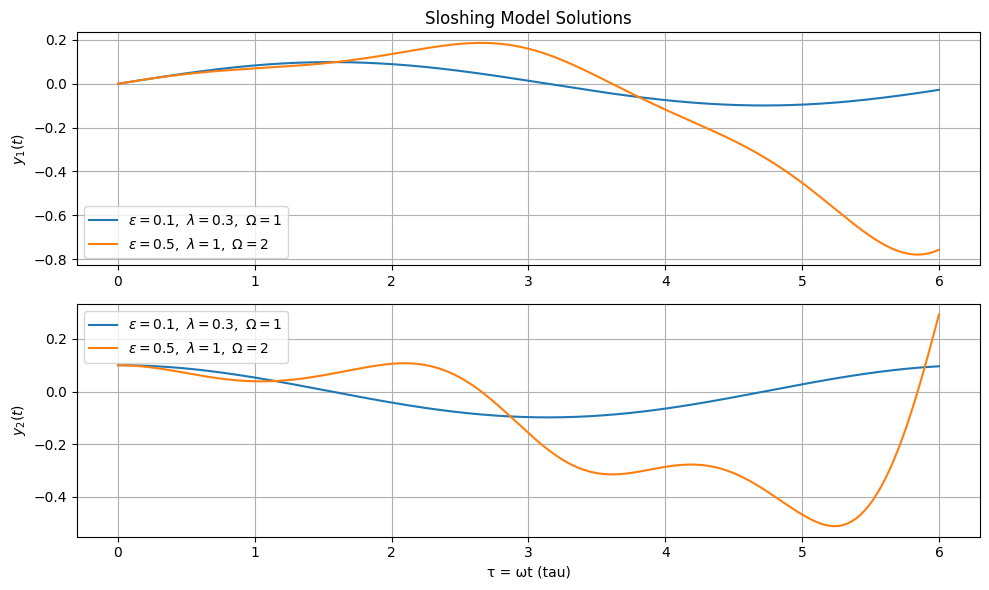

In [7]:
epsilon1, lam1, Omega1 = 0.1, 0.3, 1
t_span = (0.0, 6.0)
#Valores iniciales y_1(0) = 0.0 y y_2(0.1) = 0.1
y0 = [0.0, 0.1]

sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon1, lam1, Omega1),dense_output=True)

t_eval = np.linspace(t_span[0], t_span[1], 1000)

y1_sol1 = sol1.sol(t_eval)[0]
y2_sol1 = sol1.sol(t_eval)[1]

epsilon2, lam2, Omega2 = 0.5, 1, 2

sol2 = solve_ivp(sloshing, t_span, y0, method='RK45' ,args=(epsilon2, lam2, Omega2), dense_output=True)

y1_sol2 = sol2.sol(t_eval)[0]
y2_sol2 = sol2.sol(t_eval)[1]

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_eval, y1_sol1, label=r'$\varepsilon=0.1,\ \lambda=0.3,\ \Omega=1$')
plt.plot(t_eval, y1_sol2, label=r'$\varepsilon=0.5,\ \lambda=1,\ \Omega=2$')
plt.title('Sloshing Model Solutions')
plt.ylabel('$y_1(t)$')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_eval, y2_sol1, label=r'$\varepsilon=0.1,\ \lambda=0.3,\ \Omega=1$')
plt.plot(t_eval, y2_sol2, label=r'$\varepsilon=0.5,\ \lambda=1,\ \Omega=2$')
plt.xlabel('τ = ωt (tau)')
plt.ylabel('$y_2(t)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 5. Analisis y Conclusion

### 1. **Comportamiento temporal**

- **Solución azul ($\varepsilon=0.1, \lambda=0.3, \Omega=1$):** Presenta oscilaciones de amplitud moderada y frecuencia unitaria en $\tau$. Al tener un valor pequeño de $\varepsilon$, la respuesta se mantiene en un régimen cercano a la linealidad, con curvas relativamente “suaves” y simétricas.

- **Solución naranja ($\varepsilon=0.5, \lambda=1, \Omega=2$):** Muestra oscilaciones de mayor amplitud y un período más corto (ya que $\Omega=2$ implica que, en el mismo intervalo de $\tau$, se observan más oscilaciones). El aumento en $\varepsilon$ y $\lambda$ realza la influencia del forzamiento y de la no linealidad, de modo que las gráficas revelan variaciones más marcadas tanto en $y_1(\tau)$ (desplazamiento) como en $y_2(\tau)$ (velocidad).

### 2. **Relevancia respecto a la ecuación diferencial**

La ecuación original:
$$
u'' + \bigl[1 + \varepsilon \lambda \,\Omega^2 \cos(\Omega\,\tau)\bigr]\!
\Bigl(u - \tfrac{\varepsilon^2}{6}\,u^3\Bigr) \;=\; 0
$$
describe un oscilador que incorpora un término de bombeo ($\cos(\Omega \tau)$) y una no linealidad cúbica ($u^3$) modulada por $\varepsilon^2$.

Al incrementar $\varepsilon$ y $\lambda$, se hace más evidente la influencia del forzamiento y de los efectos no lineales, lo cual altera la amplitud, la forma de onda y la estabilidad de la oscilación.

Cuando $\Omega$ aumenta, la frecuencia efectiva de excitación supera a la frecuencia natural, provocando que el sistema realice más ciclos (en la misma escala de $\tau$) y, en ocasiones, modificando de forma notable la amplitud de la oscilación.

### 3. **Conclusiones físicas (¿Qué ocurre con el café?)**

1. **Efecto de la frecuencia de paso ($\Omega$):**  
   Si la frecuencia a la que se “bombea” el recipiente (por ejemplo, al caminar) coincide con o excede la frecuencia natural del líquido, el café oscila con ciclos más rápidos. Pueden darse resonancias si $\Omega$ se acerca a 1, o bien un forzamiento muy activo cuando $\Omega > 1$.

2. **Efecto de la no linealidad ($\varepsilon$):**  
   Con $\varepsilon$ pequeño (caso azul), el líquido se comporta de manera casi lineal, de modo que las oscilaciones son predecibles y de amplitud moderada. En cambio, con $\varepsilon$ mayor (caso naranja), la oscilación puede volverse más pronunciada, aumentando la probabilidad de derramar líquido al caminar.

3. **Efecto del acoplamiento ($\lambda$):**  
   Un valor mayor de $\lambda$ intensifica la magnitud del bombeo. Si, además, $\varepsilon$ tiene un valor elevado, el desplazamiento del café puede crecer drásticamente, generando mayores salpicaduras. Al realizar el análisis para un $\lambda$ menor, también se obtienen los resultados de Guarín (pág. 10), donde se establece que esto se traduce en menos salpicaduras y en la posibilidad de dar más pasos, como se mencionó anteriormente.

**Conclusión 1:**  
Al caminar con café, una combinación de alta frecuencia de paso ($\Omega$ grande), junto con una mayor profundidad del líquido o amplitud de oscilación efectiva ($\varepsilon$ elevada) y un acoplamiento elevado ($\lambda$ grande), genera movimientos del café más bruscos y de mayor amplitud. Esto **incrementa el riesgo de derrames**. En cambio, pasos más lentos (cuando $\Omega\approx1$ o es menor), recipientes menos llenos (con $\varepsilon$ menor) o un acoplamiento reducido ($\lambda$ pequeño) mitigan la oscilación y facilitan caminar sin derramar café.

En síntesis, estos parámetros gobiernan la dinámica de “sloshing” y explican por qué, al variar la forma de caminar o la cantidad de líquido, se modifica radicalmente la manera en que el café se mueve en el recipiente.

**Conclusión 2:** No caminar con el café. ✅QED✅

# En caso de querer experimentar:

In [ ]:
def plot_sloshing(epsilon1=0.01, lam=0.2, Omega=1.0):
    t_span = (0.0, 6.0)
    y0 = [0.0, 0.1]  # Condiciones iniciales

    # Solución 1: con ε variable (epsilon1)
    sol1 = solve_ivp(sloshing, t_span, y0, method='RK45',
                     args=(epsilon1, lam, Omega), dense_output=True)

    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    y1_sol1 = sol1.sol(t_eval)[0]
    y2_sol1 = sol1.sol(t_eval)[1]

    plt.figure(figsize=(10, 6))

    # Primer subplot: y1(t)
    plt.subplot(2, 1, 1)
    plt.plot(t_eval, y1_sol1, label=r'$y_1(t)$, $\varepsilon={:.3f}$'.format(epsilon1))
    plt.title('Soluciones del modelo de Sloshing')
    plt.ylabel('$y_1(t)$')
    plt.grid(True)
    plt.legend()

    # Segundo subplot: y2(t)
    plt.subplot(2, 1, 2)
    plt.plot(t_eval, y2_sol1, label=r'$y_2(t)$, $\varepsilon={:.3f}$'.format(epsilon1))
    plt.xlabel('τ = ωt (tau)')
    plt.ylabel('$y_2(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

interact(plot_sloshing,
         epsilon1=(0.001, 20.0, 0.001),
         lam=(0.0, 1.0, 0.01),
         Omega=(0.0, 5.0, 0.1));


interactive(children=(FloatSlider(value=0.01, description='epsilon1', max=20.0, min=0.001, step=0.001), FloatS…

### **Pregunta curiosa:** Elija un valor de *lambda* aleatorio y observe que siempre tendrá un valor de *epsilon* (o un intervalo) para el cual proporciona una solución "sin sentido". ¿Qué ocurre?  
**Tomemos:** $ɛ = 7$, $λ = 0.2$, $Ω = 2$.


A continuación, realizamos una implementación del método de Hune. Recordemos que en el método de Hune, para resolver el problema de valor inicial

$$y' = f(t, y), \quad a \leq t \leq b \quad y(a) = \alpha$$

establecemos una malla de $N$ puntos en el intervalo $[a, b]$, y aplicamos la fórmula iterativa

$$w_0 = \alpha$$
$$w_{i+1} = w_i + \frac{h}{4}(k_1 + 3k_3),$$

donde $h = \dfrac{b-a}{N}$ y

$$k_1 = f(t_i, w_i),$$
$$k_2 = f(t_i + \dfrac{h}{3}, w_i + \frac{h}{3}k_1),$$
$$k_3 = f(t_i + \dfrac{2h}{3}, w_i + \frac{2h}{3}k_2).$$

En la siguiente celda de código se encuentra la implementación del método de Hune.


In [9]:
def hune(f, a, b, initial_value, n_grid_points):
    h = (b - a) / (n_grid_points)
    w = np.zeros(n_grid_points + 1) #Creamos malla de puntos. Como se cuenta también el extremo
    t_values = np.linspace(a, b, n_grid_points + 1)        #  superior del intervalo, la malla queda de
    w[0] = initial_value                                   #  n + 1 puntos.

    for i in range(n_grid_points):
        ti = t_values[i]
        k1 = f(ti, w[i])
        k2 = f(ti + h / 3, w[i] + (h / 3) * k1)
        k3 = f(ti + (2 / 3) * h, w[i] + (2 / 3) * h * k2)

        w[i + 1] = w[i] + (h / 4) * (k1 + 3 * k3)

    return t_values, w

Como ejemplo, usemos el método de Hune para hallar la solución al problema de valor inicial

$$y' = y - t^2 + 1, \quad 0 \leq t \leq 2 \quad y(0) = 0.5, $$

con una malla de $N = 10$ puntos.

In [10]:
t_values, w_values = hune(lambda t, y: y - t**2 + 1, 0, 2, 0.5, 10)
np.column_stack((t_values, w_values))

array([[0.        , 0.5       ],
       [0.2       , 0.82924444],
       [0.4       , 1.21397499],
       [0.6       , 1.6487659 ],
       [0.8       , 2.12699053],
       [1.        , 2.64055555],
       [1.2       , 3.17957629],
       [1.4       , 3.73198028],
       [1.6       , 4.28302303],
       [1.8       , 4.81469657],
       [2.        , 5.30500719]])

La solución análitica de la ecuación diferencial anterior es

$$y(t) = (1 + t)^2 - \frac{1}{2}e^t.$$

A continuación se muestra la gráfica de la solución real, y la aproximación obtenida mediante splines cúbicos

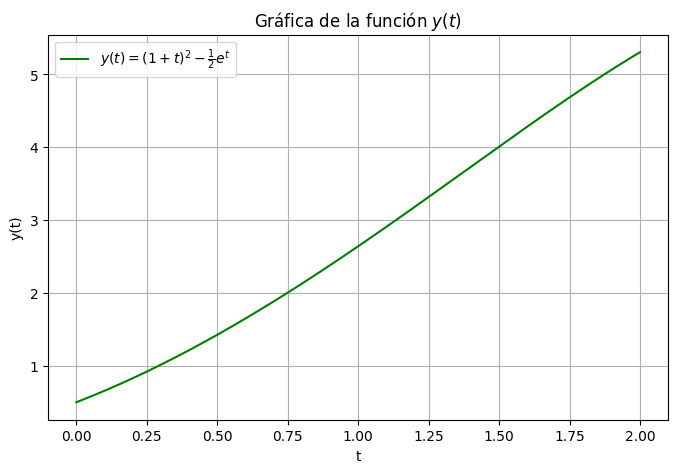

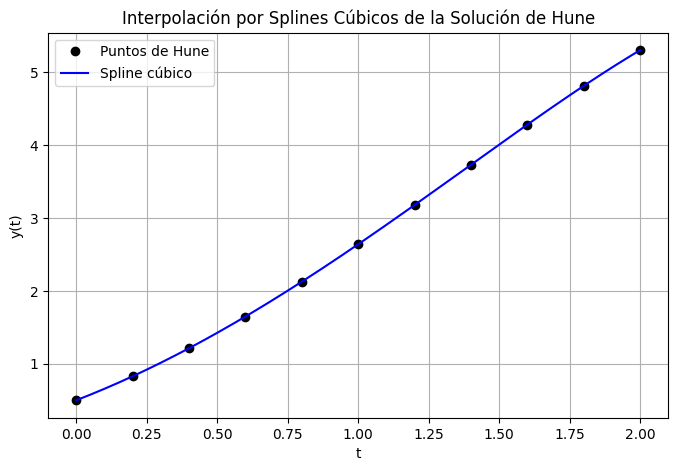

In [11]:
# Definir la función y(t)
def y(t):
    return (1 + t) ** 2 - (1 / 2) * np.exp(t)

# Generar valores de t
t_vals = np.linspace(0, 2, 200)
y_vals = y(t_vals)

# Graficar la función
plt.figure(figsize=(8, 5))
plt.plot(t_vals, y_vals, 'g-', label=r"$y(t) = (1 + t)^2 - \frac{1}{2}e^t$")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Gráfica de la función $y(t)$")
plt.legend()
plt.grid()


spline = CubicSpline(t_values, w_values)

t_fine = np.linspace(0, 2, 200)
w_fine = spline(t_fine)

plt.figure(figsize=(8, 5))
plt.plot(t_values, w_values, 'ko', label="Puntos de Hune")  # Puntos de Hune
plt.plot(t_fine, w_fine, 'b-', label="Spline cúbico")  # Interpolación
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Interpolación por Splines Cúbicos de la Solución de Hune")
plt.legend()
plt.grid()
plt.show()

Usando la norma

$$L_2 = \|f - g\|_2 = \left( \int_a^b |f(t) - g(t)|^2 dt \right)^{1/2}$$ 

hallamos la distancia entre ambas funciones para calcular el error de la solución hallada mediante interpolación. La siguiente implementación integra numericamente utilizando cuadratura Gaussiana.

In [12]:
def L2_distance(f, g, a, b):
  def l2_norm(t):
    return (f(t) - g(t)) ** 2

  return np.sqrt(quad(l2_norm, a, b)[0])

L2_distance(y, spline, 0, 2)

0.0004716563658207837

En el problema físico, estamos interesados en resolver un sistema de dos ecuaciones diferenciales. Por lo tanto, a continuación implementamos el método de Hune generalizado para sistemas de ecuaciones diferenciales.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.interpolate import CubicSpline

def hune_system(f_list, a, b, initial_values, n_grid_points):
    n_grid_points = int(n_grid_points)
    h = (b - a) / n_grid_points
    dim = len(f_list)
    w = np.zeros((n_grid_points + 1, dim))
    t_values = np.linspace(a, b, n_grid_points + 1)
    w[0, :] = initial_values

    for i in range(n_grid_points):
        ti = t_values[i]
        k1 = np.array([f(ti, *w[i, :]) for f in f_list])
        k2 = np.array([f(ti + h / 3, *(w[i, :] + (h / 3) * k1)) for f in f_list])
        k3 = np.array([f(ti + (2 / 3) * h, *(w[i, :] + (2 / 3) * h * k2)) for f in f_list])

        w[i + 1, :] = w[i, :] + (h / 4) * (k1 + 3 * k3)

    return t_values, w





Ahora, usemos la implementación del método de Hune para aproximar una solución a la ecuación diferencial del problema físico. Usaremos los siguientes valores para aproximar la solución

$$\epsilon = 0.5, \quad \lambda = 1, \quad \Omega = 2$$

del problema de valor inicial con $y_1(0) = 0$, $y_2(0) = 0.1.$

La siguiente celda de código implementa las funciones necesarias para hacer las gráficas correspondientes.

In [41]:
def sloshing(t, y, epsilon, lam, Omega):
  y1, y2 = y
  dy1_dt = y2
  dy2_dt = - (1 + epsilon * lam * Omega**2 * np.cos(Omega * t)) * (y1 - (epsilon**2 / 6) * y1**3)

  return [dy1_dt, dy2_dt]

def sloshing_functions(epsilon, lam, omega):

  def y_1_prime(t, y1, y2):
    return y2

  def y_2_prime(t, y1, y2):
    return - (1 + epsilon * lam * omega**2 * np.cos(omega * t)) * (y1 - (epsilon**2 / 6) * y1**3)

  return [y_1_prime, y_2_prime]

sol2 = solve_ivp(sloshing, t_span, y0, method='RK45' ,args=(epsilon2, lam2, Omega2), dense_output=True)
y1_sol2 = sol2.sol(t_eval)[0]
y2_sol2 = sol2.sol(t_eval)[1]
sols = [y1_sol2, y2_sol2]


def plot_hune_solution(t_values, w):
    num_functions = w.shape[1]
    fig, axes = plt.subplots(num_functions, 1, figsize=(10, 6))

    if num_functions == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        cs = CubicSpline(t_values, w[:, i])
        t_fine = np.linspace(t_values[0], t_values[-1], 1000)
        w_fine = cs(t_fine)
        ax.plot(t_fine, w_fine, label=f'$y_{i+1}(t)$', color='orange')
        ax.plot(t_eval, sols[i], label=r'$\varepsilon=0.5,\ \lambda=1,\ \Omega=2$', color ='gray', linestyle = 'dashed')
        plt.subplots_adjust(hspace=0.4)  # Aumenta el espacio vertical
        ax.set_xlabel('Tiempo escalado ($\omega$t)')
        ax.set_ylabel(f'$y_{i+1}(t)$')
        ax.set_title(f'Solución para $y_{i+1}(t)$')
        ax.legend()
        ax.grid()

epsilon1, lam1, Omega1 = 0.1, 0.3, 1
t_span = (0.0, 6.0)
#Valores iniciales y_1(0) = 0.0 y y_2(0.1) = 0.1
y0 = [0.0, 0.1]



La siguiente gráfica permite ver las aproximaciones de la solución de Hune para mallas de puntos interactivas. La gráfica naranja corresponde a la interpolación mediante splines cúbicos de la solución de Hune, y la gráfica gris corresponde a la solución encontrada mediante Scipy, para los parámetros $\epsilon = 0.5, \lambda = 1, \Omega = 2$.  

In [ ]:
def interactive_plot(last_param):
    last_param = int(last_param)
    t_values, w = hune_system(sloshing_functions(0.5, 1, 2), 0, 6, [0, 0.1], last_param)
    plot_hune_solution(t_values, w)

interact(interactive_plot, last_param=(1, 20, 1))

interactive(children=(IntSlider(value=10, description='last_param', max=20, min=1), Output()), _dom_classes=('…

<function __main__.interactive_plot(last_param)>

## Discusión

Vemos que a medida aumentamos el número de puntos de la malla, la solución se vuelve cada vez más y más buena, comparada con la solución de Scipy en la que fue usada una malla de 1000 puntos. Para una malla de 20 puntos usando el método de Hune ya logramos una solución muy parecida a la solución de Scipy. Sin embargo, recordemos que el método de Hune tiene orden de $O(h^3)$. Si hubieramos implementado el método de Runge-Kutta de orden 4, necesitariamos incluso menos puntos en la malla para llegar a una solución buena, pues el orden de convergencia del método de Runge-Kutta de orden 4 es de $O(h^4)$.